# Fazendo queries no Google Colab (SQL no pandas)


## 1. Upload de um arquivo CSV e leitura com pandas

In [4]:
import pandas as pd

# Substitua com o nome do arquivo
clientes_df = pd.read_excel("./datasets/clientes_dataset.xlsx")
clientes_df.head()

,cliente_id,nome,email,idade,cidade,estado,data_ultima_compra,total_gasto,frequencia_compras,forma_pagamento,satisfacao,cliente_ativo
0,1,Norma Fisher,christopherbond@yahoo.com,62,Elliottmouth,NJ,2025-01-26,4635.94,21,Crédito,1,False
1,2,Jorge Sullivan,jeaton@yahoo.com,65,East Adam,PA,2024-05-24,1615.33,5,Boleto,4,False
2,3,Elizabeth Woods,mfuller@jones-taylor.com,18,Whitetown,GA,2024-09-29,2075.77,13,Boleto,3,True
3,4,Susan Wagner,lauren75@gmail.com,21,Jamesside,RI,2025-01-03,3202.00,22,Débito,5,False
4,5,Peter Montgomery,tdaugherty@pratt-crawford.com,21,Heidiborough,TN,2024-11-28,4464.20,18,Crédito,5,True


## 2. Enviar os dados para o SQLite

In [5]:
import sqlite3

conn = sqlite3.connect(":memory:")
clientes_df.to_sql("clientes", conn, index=False, if_exists="replace")

1000

## 3. Usando SQL no pandas com `read_sql_query()`


### 🔹 SELECT – Escolher colunas

In [6]:
resultado_select = pd.read_sql_query("SELECT nome, idade FROM clientes", conn)
resultado_select.head()

,nome,idade
0,Norma Fisher,62
1,Jorge Sullivan,65
2,Elizabeth Woods,18
3,Susan Wagner,21
4,Peter Montgomery,21


### 🔹 WHERE – Filtrar linhas

In [ ]:
resultado_where = pd.read_sql_query("SELECT * FROM clientes WHERE cidade = 'Elliottmouth'", conn)
resultado_where.head()

,cliente_id,nome,email,idade,cidade,estado,data_ultima_compra,total_gasto,frequencia_compras,forma_pagamento,satisfacao,cliente_ativo
0,1,Norma Fisher,christopherbond@yahoo.com,62,Elliottmouth,NJ,2025-01-26 00:00:00,4635.94,21,Crédito,1,0


### 🔹 LIMIT – Limitar o número de resultados

In [ ]:
pd.read_sql_query("SELECT * FROM clientes LIMIT 5", conn)

,cliente_id,nome,email,idade,cidade,estado,data_ultima_compra,total_gasto,frequencia_compras,forma_pagamento,satisfacao,cliente_ativo
0,1,Norma Fisher,christopherbond@yahoo.com,62,Elliottmouth,NJ,2025-01-26 00:00:00,4635.94,21,Crédito,1,0
1,2,Jorge Sullivan,jeaton@yahoo.com,65,East Adam,PA,2024-05-24 00:00:00,1615.33,5,Boleto,4,0
2,3,Elizabeth Woods,mfuller@jones-taylor.com,18,Whitetown,GA,2024-09-29 00:00:00,2075.77,13,Boleto,3,1
3,4,Susan Wagner,lauren75@gmail.com,21,Jamesside,RI,2025-01-03 00:00:00,3202.00,22,Débito,5,0
4,5,Peter Montgomery,tdaugherty@pratt-crawford.com,21,Heidiborough,TN,2024-11-28 00:00:00,4464.20,18,Crédito,5,1


### 🔹 AND / OR / NOT – Combinações lógicas

In [ ]:
resultado_and = pd.read_sql_query("SELECT * FROM clientes WHERE idade > 30 AND estado = 'PA' AND satisfacao < 3", conn)

In [ ]:
resultado_and.describe()

,cliente_id,idade,total_gasto,frequencia_compras,satisfacao,cliente_ativo
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,494.833333,48.833333,1790.621667,13.833333,1.666667,1.0
std,314.682327,11.250185,1640.894882,4.578937,0.516398,0.0
min,132.000000,37.000000,579.690000,8.000000,1.000000,1.0
25%,214.750000,40.250000,639.585000,10.000000,1.250000,1.0
50%,524.500000,46.000000,925.340000,15.000000,2.000000,1.0
75%,746.500000,58.500000,2799.482500,17.000000,2.000000,1.0
max,856.000000,63.000000,4344.830000,19.000000,2.000000,1.0


In [ ]:
pd.read_sql_query("SELECT * FROM clientes WHERE NOT estado = 'RI'", conn)

,cliente_id,nome,email,idade,cidade,estado,data_ultima_compra,total_gasto,frequencia_compras,forma_pagamento,satisfacao,cliente_ativo
0,1,Norma Fisher,christopherbond@yahoo.com,62,Elliottmouth,NJ,2025-01-26 00:00:00,4635.94,21,Crédito,1,0
1,2,Jorge Sullivan,jeaton@yahoo.com,65,East Adam,PA,2024-05-24 00:00:00,1615.33,5,Boleto,4,0
2,3,Elizabeth Woods,mfuller@jones-taylor.com,18,Whitetown,GA,2024-09-29 00:00:00,2075.77,13,Boleto,3,1
3,5,Peter Montgomery,tdaugherty@pratt-crawford.com,21,Heidiborough,TN,2024-11-28 00:00:00,4464.20,18,Crédito,5,1
4,6,Theodore Mcgrath,grant52@yahoo.com,57,East Josephberg,CA,2024-05-08 00:00:00,2219.77,23,Crédito,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
971,996,Howard Anderson,barberapril@bowman-meyer.com,54,Teresaside,WA,2024-11-14 00:00:00,4131.28,3,Débito,4,1
972,997,Jacob Rivera,ramoskatherine@li-decker.org,19,Rodriguezborough,NJ,2024-06-02 00:00:00,236.94,7,Pix,1,1
973,998,Lori Rodriguez,kimberlykeller@gmail.com,47,Nicholasburgh,AK,2024-10-09 00:00:00,1867.11,4,Débito,3,1
974,999,Whitney Diaz,kennethnguyen@patton-martin.com,23,Tannerberg,FL,2024-05-23 00:00:00,981.54,14,Boleto,5,0


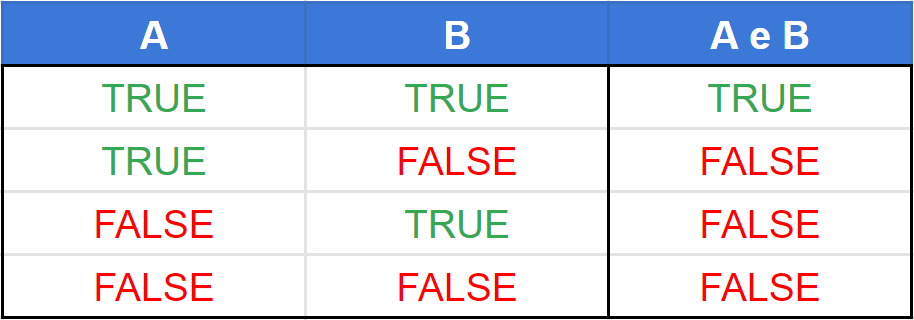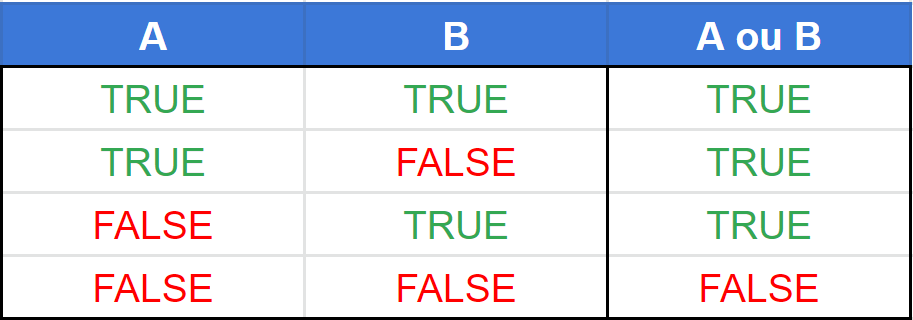

### 🔹 ORDER BY – Ordenar os resultados

In [ ]:
pd.read_sql_query("SELECT * FROM clientes ORDER BY estado, idade DESC ", conn)

,cliente_id,nome,email,idade,cidade,estado,data_ultima_compra,total_gasto,frequencia_compras,forma_pagamento,satisfacao,cliente_ativo
0,746,Linda Davis,lreilly@walker.org,66,Port Chad,AK,2024-04-09 00:00:00,103.51,1,Crédito,1,1
1,490,Richard Morales,bmarquez@yahoo.com,58,Shelbyland,AK,2024-04-25 00:00:00,403.98,24,Débito,4,1
2,828,Shane Lewis,jenningsamy@riley.org,57,Smithshire,AK,2024-12-12 00:00:00,841.79,2,Pix,1,1
3,76,Matthew Russo,wscott@taylor-robertson.info,56,Josephburgh,AK,2024-11-04 00:00:00,4183.25,6,Pix,3,0
4,116,Mr. Dakota Lynch II,petersonchristopher@yahoo.com,54,Karaburgh,AK,2024-12-16 00:00:00,445.01,3,Pix,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,390,Russell Jones,monica48@gmail.com,23,Brownfurt,WY,2025-02-01 00:00:00,4261.66,8,Débito,5,1
996,186,Rebecca Hill,gclayton@white.net,22,West Catherine,WY,2024-09-12 00:00:00,2093.92,17,Pix,5,1
997,48,William Gonzalez,davisdaniel@fritz-robbins.com,19,South Robert,WY,2024-04-25 00:00:00,3134.00,17,Pix,5,1
998,705,Monica Morales,yjones@mueller.com,19,Flowersmouth,WY,2025-01-31 00:00:00,3280.25,5,Boleto,5,1


### 🔹 AS – Renomear colunas no resultado

In [ ]:
resultado_as = pd.read_sql_query("SELECT nome AS cliente, cidade AS local, idade FROM clientes", conn)

In [ ]:
resultado_as.head()

,cliente,local,idade
0,Norma Fisher,Elliottmouth,62
1,Jorge Sullivan,East Adam,65
2,Elizabeth Woods,Whitetown,18
3,Susan Wagner,Jamesside,21
4,Peter Montgomery,Heidiborough,21


### 🔹 DISTINCT – Eliminar valores repetidos

In [ ]:
pd.read_sql_query("SELECT DISTINCT satisfacao FROM clientes", conn)

,satisfacao
0,1
1,4
2,3
3,5
4,2


### 🔹 IN / BETWEEN / LIKE – Filtros flexíveis

In [ ]:
pd.read_sql_query("SELECT * FROM clientes WHERE idade IN ('18', '23', '24', '35')", conn)

,cliente_id,nome,email,idade,cidade,estado,data_ultima_compra,total_gasto,frequencia_compras,forma_pagamento,satisfacao,cliente_ativo
0,3,Elizabeth Woods,mfuller@jones-taylor.com,18,Whitetown,GA,2024-09-29 00:00:00,2075.77,13,Boleto,3,1
1,13,Jennifer Summers,melissayoder@barrera-schmidt.com,24,Aprilbury,UT,2024-06-18 00:00:00,3296.31,5,Pix,3,1
2,23,Janice Johnston,victoria28@rojas.com,35,Port Nathanville,MS,2024-09-28 00:00:00,4788.97,17,Pix,4,1
3,33,Angela Salazar,dorismartinez@hamilton.com,23,North Jason,MI,2024-03-30 00:00:00,2223.07,3,Pix,3,1
4,36,Faith Cabrera,kathrynhudson@mitchell.com,18,New Amandaview,TX,2024-07-08 00:00:00,4688.69,13,Pix,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
82,951,Curtis Bradley,burtonalfred@gmail.com,35,West Cindy,FL,2025-01-14 00:00:00,2336.22,4,Boleto,1,1
83,981,Jeremy Manning,thomasbrown@french.biz,35,Coreyborough,IL,2024-07-31 00:00:00,1253.86,2,Débito,5,0
84,994,Kenneth Williams,barryjonathan@yahoo.com,35,West Eddie,OK,2024-12-15 00:00:00,1379.73,18,Crédito,3,1
85,995,Kristine Hart,michaelchase@hotmail.com,23,Michaelberg,CT,2024-08-15 00:00:00,327.28,8,Pix,3,0


In [ ]:
df = pd.read_sql_query("SELECT * FROM clientes WHERE idade BETWEEN 30 AND 40", conn)

In [ ]:
df.describe()

,cliente_id,idade,total_gasto,frequencia_compras,satisfacao,cliente_ativo
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,503.176768,34.929293,2593.930707,12.398990,3.277778,0.747475
std,300.661798,3.093312,1443.503525,6.920682,1.285851,0.435562
min,8.000000,30.000000,142.580000,1.000000,1.000000,0.000000
25%,228.000000,32.000000,1348.287500,7.000000,2.000000,0.250000
50%,479.500000,35.000000,2723.150000,12.000000,3.500000,1.000000
75%,768.750000,37.750000,3823.555000,18.750000,4.000000,1.000000
max,1000.000000,40.000000,4961.160000,24.000000,5.000000,1.000000


In [ ]:
pd.read_sql_query("SELECT * FROM clientes WHERE nome LIKE 'C%'", conn)  # começa com A

### 🔹 GROUP BY + HAVING – Agrupamentos com condição

In [ ]:
resultado_having = pd.read_sql_query('''
SELECT forma_pagamento, SUM(total_gasto) as total
FROM clientes
GROUP BY forma_pagamento
''', conn)

In [ ]:
resultado_having

,forma_pagamento,total
0,Boleto,591950.89
1,Crédito,675494.37
2,Débito,625409.22
3,Pix,653607.69


In [ ]:
resultado_having = pd.read_sql_query('''
SELECT estado, COUNT(*) as total
FROM clientes
GROUP BY estado
HAVING total > 25
''', conn)

In [ ]:
resultado_having

,estado,total
0,KY,28
1,MI,27
2,NC,30
3,NH,29
4,PA,30


## Conclusão
- Você aprendeu como aplicar os principais comandos SQL dentro do Colab
- Conseguiu filtrar, ordenar, agrupar e transformar dados com consultas simples
- Tudo isso de forma integrada com o pandas e sem sair do notebook

# Testes

1. Quais clientes moram em São Paulo?

2. Quais clientes têm mais de 30 anos?

3. Quais clientes não são do Rio de Janeiro?

4. Liste o nome e a cidade dos clientes com idade entre 25 e 40 anos.

5. Quais clientes têm nomes que começam com a letra C?

6. Em quais cidades temos clientes (sem repetir)?

7. Quais são os 3 clientes mais velhos?

8. Mostre o nome e idade, renomeando as colunas para cliente e anos.

9. Liste todas as cidades ordenadas alfabeticamente.

10. Quantos clientes existem por cidade?

11. Quais cidades têm mais de 2 clientes cadastrados?

12. Qual a idade média dos clientes por cidade?

13. Qual é o total de compras por cliente?

14. Quem são os clientes que já fizeram mais de 1 compra?

15. Qual cidade tem o maior número de clientes ativos?

16. Qual cliente gastou mais no total?

17. Existe alguém que tenha comprado duas vezes no mesmo dia?

18. Quais formas de pagamento são mais comuns?

19. Quais clientes moram em Curitiba, Recife ou Salvador?

20. Quais clientes têm idade entre 20 e 40 anos?